In [2]:
import postgresql
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## 1. Create a DataFrame with the Census Data from HW2

Find two examples in the course content in Blackboard  
Database Details:   
user='new_haven_ds_read'  
password='new_haven_ds_secret_99'  
host='nhds.cwroivw0q1rc.us-east-1.rds.amazonaws.com'  
database='nhds'  
  
  
 SQL: sql = 'select * from nhds.uci_adults'

In [3]:
db = postgresql.open("pq://new_haven_ds_read:new_haven_ds_secret_99@nhds.cwroivw0q1rc.us-east-1.rds.amazonaws.com/nhds")

In [4]:
sql = 'select * from nhds.uci_adults'

ps = db.prepare(sql)

res = ps()

In [5]:
res


[(39,
  ' State-gov',
  77516,
  ' Bachelors',
  13,
  ' Never-married',
  ' Adm-clerical',
  ' Not-in-family',
  ' White',
  ' Male',
  2174,
  0,
  40,
  ' United-States',
  ' <=50K',
  1),
 (50,
  ' Self-emp-not-inc',
  83311,
  ' Bachelors',
  13,
  ' Married-civ-spouse',
  ' Exec-managerial',
  ' Husband',
  ' White',
  ' Male',
  0,
  0,
  13,
  ' United-States',
  ' <=50K',
  2),
 (38,
  ' Private',
  215646,
  ' HS-grad',
  9,
  ' Divorced',
  ' Handlers-cleaners',
  ' Not-in-family',
  ' White',
  ' Male',
  0,
  0,
  40,
  ' United-States',
  ' <=50K',
  3),
 (53,
  ' Private',
  234721,
  ' 11th',
  7,
  ' Married-civ-spouse',
  ' Handlers-cleaners',
  ' Husband',
  ' Black',
  ' Male',
  0,
  0,
  40,
  ' United-States',
  ' <=50K',
  4),
 (28,
  ' Private',
  338409,
  ' Bachelors',
  13,
  ' Married-civ-spouse',
  ' Prof-specialty',
  ' Wife',
  ' Black',
  ' Female',
  0,
  0,
  40,
  ' Cuba',
  ' <=50K',
  5),
 (37,
  ' Private',
  284582,
  ' Masters',
  14,
  ' Marrie

## 2. Split the data into training and testing sets

In [6]:
df = pd.DataFrame(res, columns=ps.column_names) #creation of dataframe

In [7]:
df.tail(3)

age      workclass  fnlwgt education  educational_num  \
32558   58        Private  151910   HS-grad                9   
32559   22        Private  201490   HS-grad                9   
32560   52   Self-emp-inc  287927   HS-grad                9   

            marital_status        occupation relationship    race   gender  \
32558              Widowed      Adm-clerical    Unmarried   White   Female   
32559        Never-married      Adm-clerical    Own-child   White     Male   
32560   Married-civ-spouse   Exec-managerial         Wife   White   Female   

       capital_gain  capital_loss  hours_per_week  native_country  income  \
32558             0             0              40   United-States   <=50K   
32559             0             0              20   United-States   <=50K   
32560         15024             0              40   United-States    >50K   

          id  
32558  32559  
32559  32560  
32560  32561

In [8]:
for column in df.columns:
    if df[column].dtype == type(object):
        le = sklearn.preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column]) #Label Encoding to get rid of object types

In [9]:
df.tail(3)

age  workclass  fnlwgt  education  educational_num  marital_status  \
32558   58          4  151910         11                9               6   
32559   22          4  201490         11                9               4   
32560   52          5  287927         11                9               2   

       occupation  relationship  race  gender  capital_gain  capital_loss  \
32558           1             4     4       0             0             0   
32559           1             3     4       1             0             0   
32560           4             5     4       0         15024             0   

       hours_per_week  native_country  income     id  
32558              40              39       0  32559  
32559              20              39       0  32560  
32560              40              39       1  32561

In [10]:
x = df.drop(columns="income")
y = df['income']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y) #Splitting dataset into training and testing

## 3. Use sklearn's LabelEncoder to make the columns with strings usuable

In [12]:
# Done it above

## 4. Create a Decision Tree with the Census Data

In [13]:
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(x_train, y_train) #Training Decision Tree Classifier

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## 5. Export a graphical visualization of your tree.  You may find it easy to use the graphviz package.

In [14]:
from sklearn.externals.six import StringIO 
from sklearn.model_selection import train_test_split
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

C:\Users\HP\AppData\Local\conda\conda\envs\tf2\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.273718 to fit



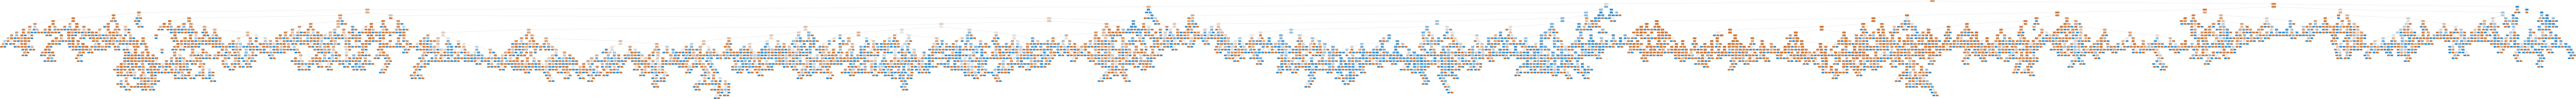

In [15]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) #Creation of Visual decision tree

In [16]:
dtree.predict(x_test) #Predicition

array([1, 0, 0, ..., 0, 1, 0])

In [17]:
dtree.score(x_test, y_test) #Accuarcy of Decision Tree

0.8092371944478566

## 6. Create a Random Forest with the same Census Data

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train) #Training Random Forest Classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
rf.score(x_test, y_test) #Testing Accuarcy

0.8630389387053188

# 7. Compare the Accuracy of the Random Forest and the base Decision Tree.  Which is Better?  Why?

In [27]:
print("We get",(rf.score(x_test, y_test) - dtree.score(x_test, y_test)).round(5)*100, "% more accuarcy in Random Forest as Compared to Decision Tree.")

We get 5.38 % more accuarcy in Random Forest as Compared to Decision Tree.


In [31]:
print("So ultimately the Algorithm which gives more accuracy is considered as the Better One.")
print("The Random Forest Algorithm makes use of more number of decision trees and combine together them to get the better results.")
print("So Random Forest Tree Algorithm should be preffered as a Better One, also it gives more options for parameters.")

So ultimately the Algorithm which gives more accuracy is considered as the Better One.
The Random Forest Algorithm makes use of more number of decision trees and combine together them to get the better results.
So Random Forest Tree Algorithm should be preffered as a Better One, also it gives more options for parameters.
